In [3]:
import math
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
import numpy.random as random

In [4]:
def rec(mu, sigma, N):
    A = np.exp(scs.norm.rvs(loc=mu, scale=sigma, size=N))
    Y = np.zeros(N+1)
    Y[0] = 1
    for i in range(N):
        Y[i+1] = 1+A[i]*Y[i]
    return Y

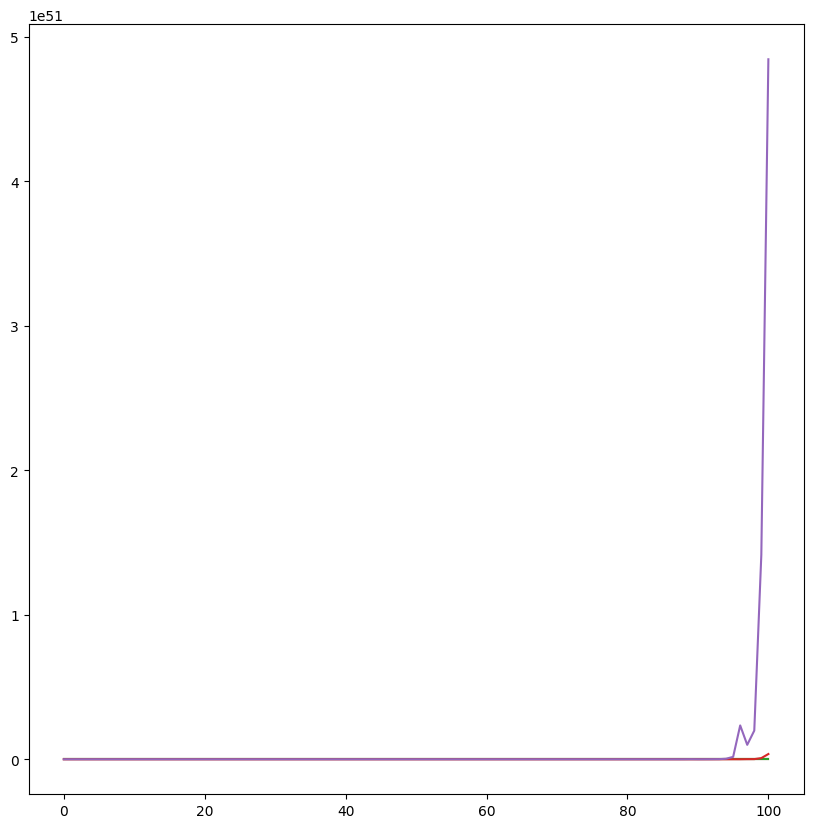

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
for _ in range(5):
    ax.plot(np.arange(101), rec(1, 1, 100))
plt.show()

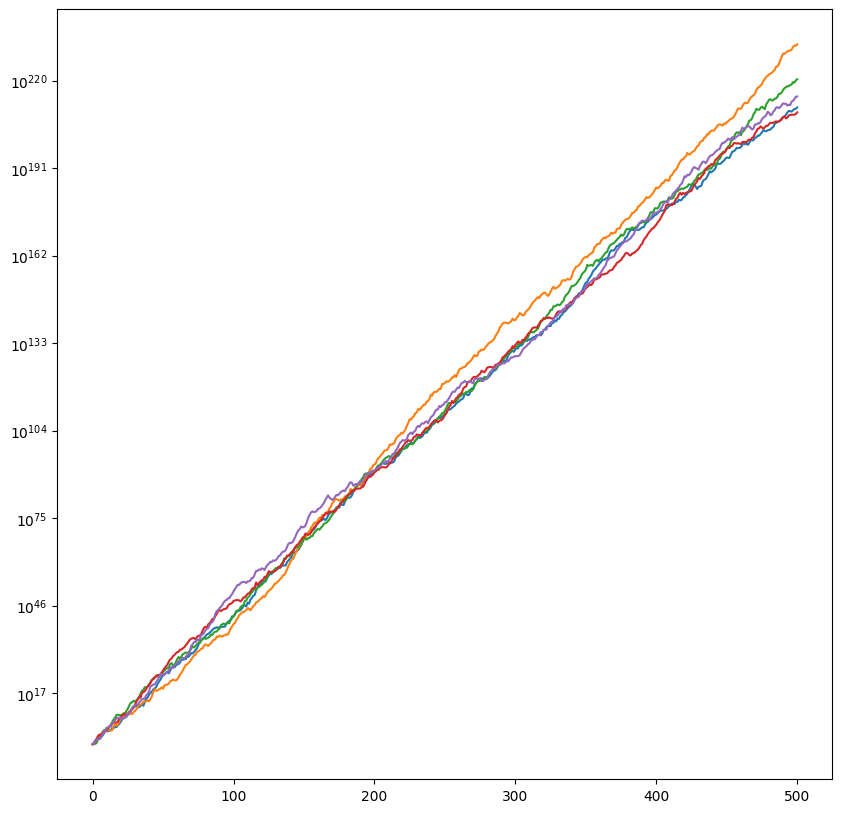

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
for _ in range(5):
    ax.plot(np.arange(501), rec(1, 1, 500))
ax.set_yscale('log')
plt.show()

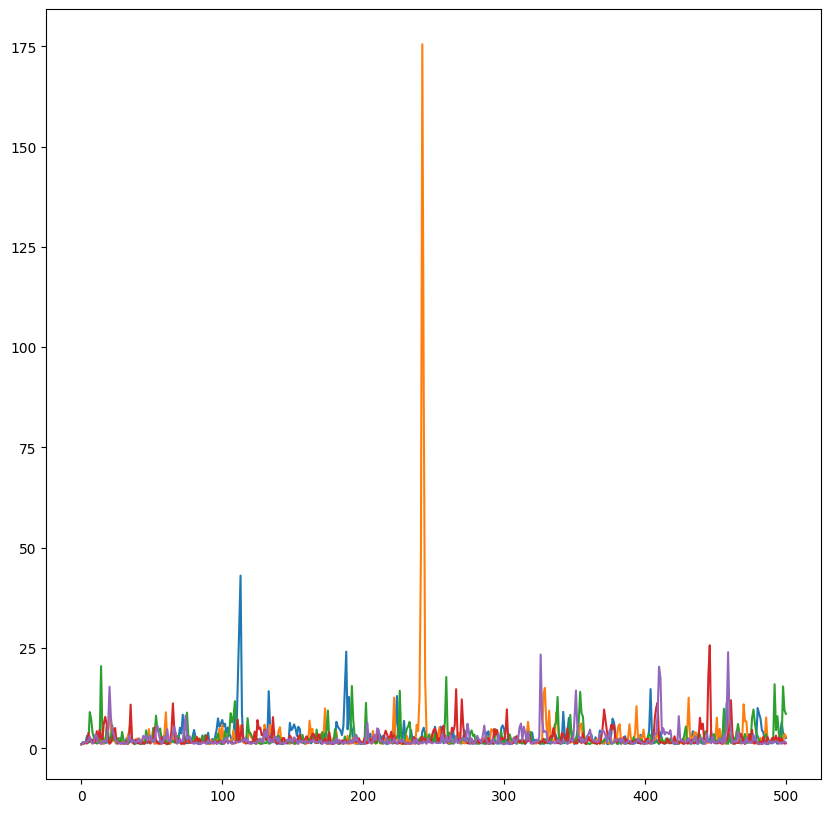

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
for _ in range(5):
    ax.plot(np.arange(501), rec(-1, 1, 500))
plt.show()

In [13]:
def F2(N):
    Y = rec(-1, 1, N)
    F = np.cumsum((Y<=2))/np.arange(1,N+2)
    return F

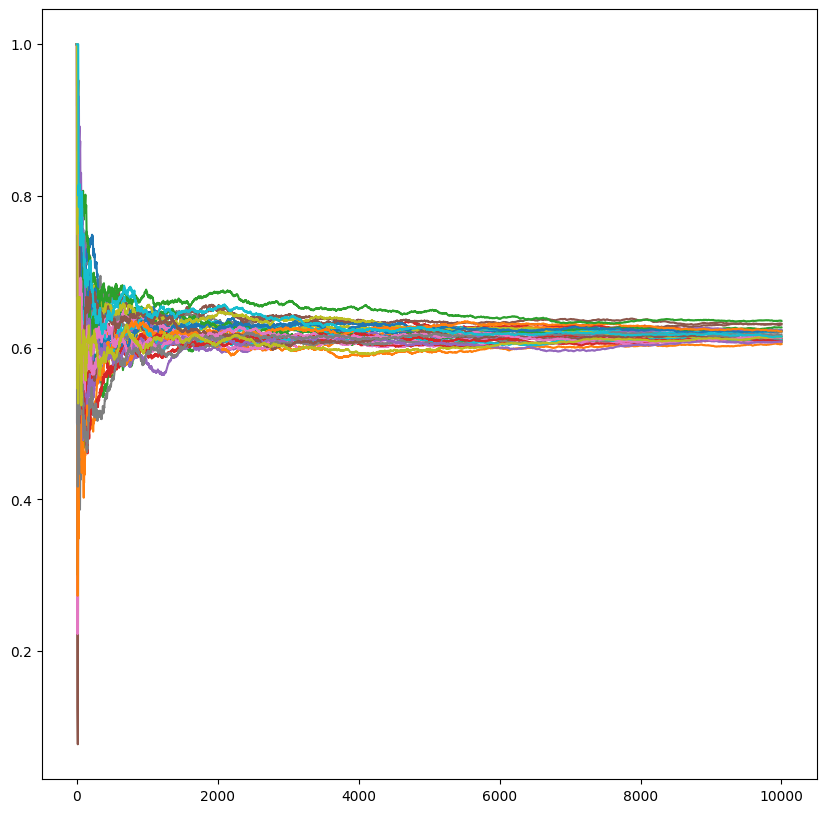

In [14]:
fig, ax = plt.subplots(figsize=(10,10))
for _ in range(30):
    ax.plot(np.arange(10**4+1), F2(10**4))
plt.show()

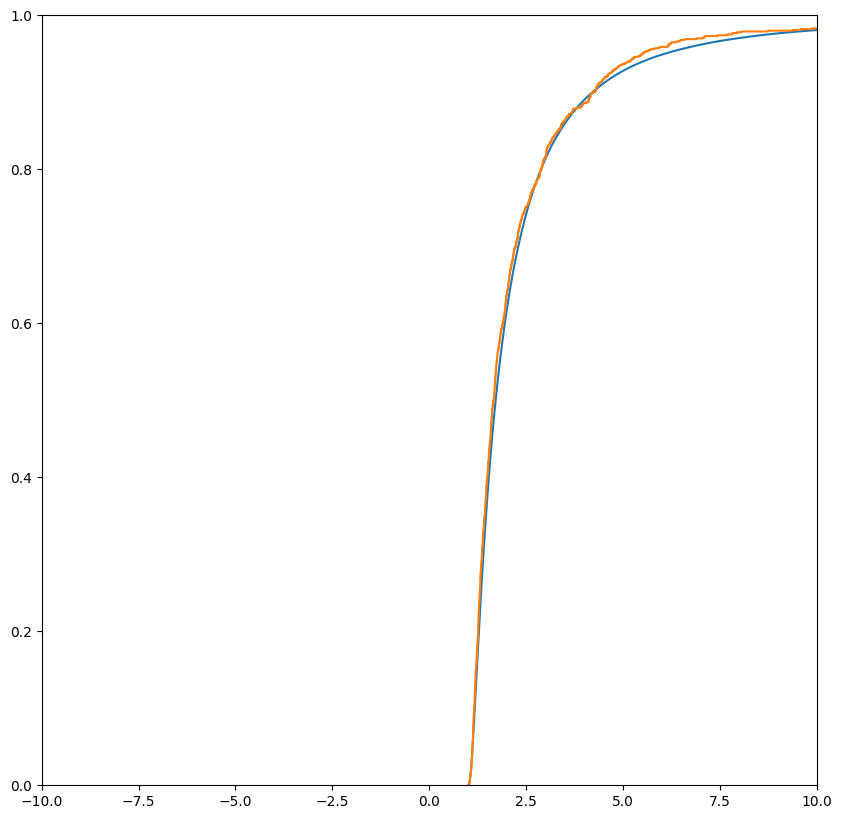

In [15]:
fig, ax = plt.subplots(figsize=(10,10))
Y = rec(-1, 1, 10**6)
ax.ecdf(Y)
Y2 = [rec(-1, 1, 10**4)[-1] for _ in range(10**3)]
ax.ecdf(Y2)
ax.set_xlim(-10,10)
plt.show()

In [16]:
def simuleserie(D, p, N):
    res = np.array([np.sum(scs.bernoulli.rvs(p, size=D) * np.array([2**(-i-1) for i in range(D)])) for _ in range(N)])
    return res

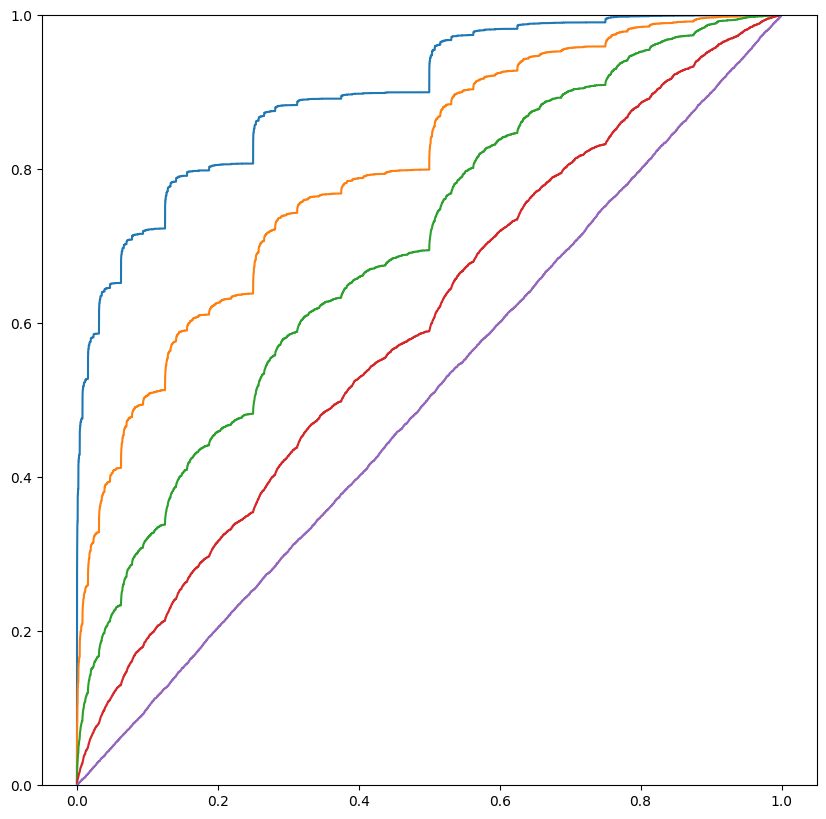

In [17]:
fig, ax = plt.subplots(figsize=(10,10))
for p in np.arange(1,6)/10:
    ax.ecdf(simuleserie(30, p, 10**4))
plt.show()
            